# 한글 워드 클라우드 - 여친선물

## KoNLPyt설치
- konlpy오류시 참고

In [2]:
import konlpy
konlpy.__version__

'0.5.2'

In [7]:
# open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')


['해당', '에러', '발생', '것', '알', '수']

### 여친 선물 - 워드 클라우드 만들기

In [12]:
with open('data/gift.txt', encoding='UTF-8') as file:
    gift_text = file.read()


In [13]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [14]:
### [^ㄱ-ㅎㅏ-ㅣ가-힣] 한글을 제외한 나머지
### re.sub(패턴, 변경할 내용, 변결할 대상 문자열)

In [15]:
import re

In [23]:
text = '나는 zsfd오늘 집에서  asf밥을 먹었다'
re.sub('[^가-힣 ]','',text) 

'나는 오늘 집에서  밥을 먹었다'

In [38]:
# 한글 이외의 글자는 제거
import re
new_tokens = []
for token in tokens:
    new_token = re.sub('[^가-힣]','',token)     # ring이라는 단어가 있으면
    if new_token:                               # ''으로 나오기 때문에 배제하기 위해서
        new_tokens.append(new_token)

In [32]:
if '':
    print('a')
else:
    print('b')

b


In [33]:
# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["font.family"] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 처리

In [40]:
import nltk

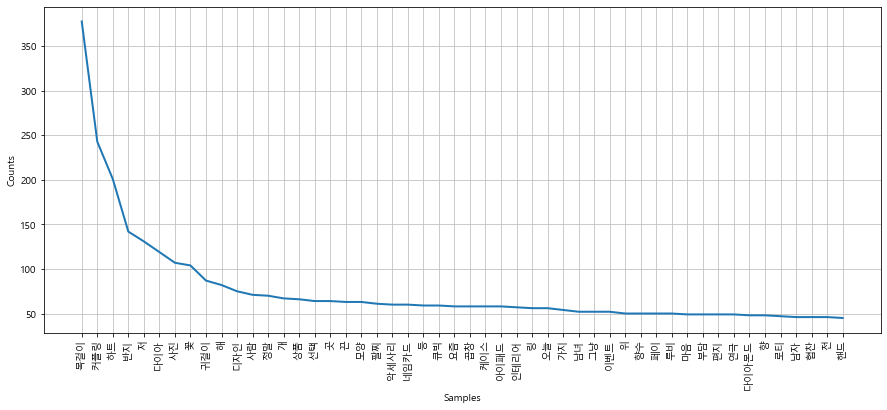

In [64]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [63]:
# 처음부터 stop_list해서 수고를 하지말고
# stop_list = ['선물','추천']
# 쭉 써내려간다음 split()으로 한번에 리스트로 분리
stopwords = '한번 제작 용 준 거 네이버 사랍 배송 중 티니 후기 감동 세대 인기 브랜드 직접 마감 요 더 사용 구매 고급 판매 때 참고 머리 하나 선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 생각 여자 분'
stop_list = stopwords.split()

#new_token_list = []
#for token in new_tokens:
#    if token not in stop_list:
#        new_token_list.append(token)
#new_tokens = new_token_list

new_tokens = [token for token in tokens if token not in stop_list]
# 반복하면서 처리

In [66]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [67]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 378),
 ('커플링', 243),
 ('하트', 201),
 ('반지', 142),
 ('저', 131),
 ('다이아', 119),
 ('사진', 107),
 ('꽃', 104),
 ('귀걸이', 87),
 ('해', 82)]

In [104]:
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                relative_scaling=0.2,
                background_color='white'
).generate_from_frequencies(dict(data))

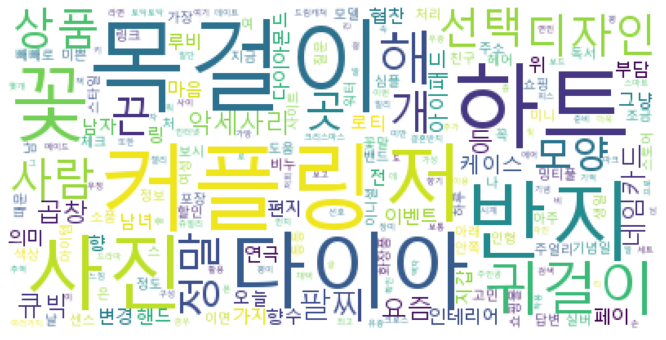

In [105]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### 하트 그림에 표시하기

In [108]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [116]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.3, mask=mask,
    background_color='white',
    min_font_size = 1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

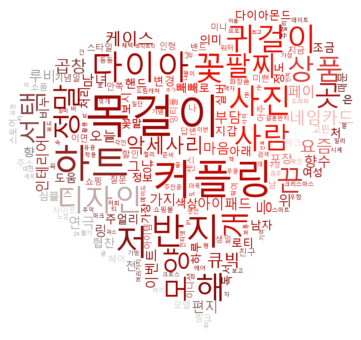

In [117]:
plt.figure(figsize=(12,6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [1]:
# a = 'My wife likes to watch baseball games and my daughter likes to watch base ball games too'
# b = a.split()
# from sklearn.preprocessing import LabelEncoder                                                        # 혼자서 해본것.
# encoder = LabelEncoder()
# c = encoder.fit_transform(b)
# c